# 🌍 [예시 주제] 지진은 어디에서 자주 발생할까?(예시)

USGS(미국 지질조사국) 데이터를 이용해 **아시아 지역의 지진 분포**를 시각화하고, 
**지진 규모의 빈도**를 분석하는 실습 과제입니다.

## 🧭 실습 목표
(여러분들의 아이디어를 추가)
- 전 세계 지진 데이터 중 아시아 지역(위도 20~50, 경도 120~150)을 필터링
- 지도에 지진 위치 표시 (folium)
- 지진 규모의 분포를 히스토그램으로 시각화 (seaborn)


In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 🌐 지진 데이터 불러오기 (7일간 규모 1.0 이상)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv"
df = pd.read_csv(url)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-06-12T22:51:51.980Z,38.834835,-122.800835,2.08,1.35,md,26.0,59.0,0.008937,0.02,...,2025-06-12T22:53:30.996Z,"7 km WNW of Cobb, CA",earthquake,0.17,0.36,0.160,26.0,automatic,nc,nc
1,2025-06-12T22:41:16.560Z,33.789833,-116.077833,1.38,1.02,ml,27.0,87.0,0.119900,0.17,...,2025-06-12T22:48:29.788Z,"15 km ENE of Indio, CA",earthquake,0.23,0.39,0.127,25.0,automatic,ci,ci
2,2025-06-12T22:40:27.577Z,60.442900,-143.187100,14.30,1.30,ml,NaN,NaN,NaN,0.42,...,2025-06-12T22:41:59.323Z,"111 km S of McCarthy, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2025-06-12T22:33:27.090Z,35.327000,-117.809167,6.76,0.99,ml,18.0,122.0,0.066580,0.20,...,2025-06-12T22:36:48.734Z,"17 km WSW of Johannesburg, CA",earthquake,0.37,0.64,0.173,17.0,automatic,ci,ci
4,2025-06-12T22:31:45.230Z,35.329500,-117.812000,7.40,2.00,ml,51.0,35.0,0.067830,0.19,...,2025-06-12T22:42:25.380Z,"17 km WSW of Johannesburg, CA",earthquake,0.15,0.58,0.171,24.0,automatic,ci,ci


In [ ]:
# 아메리카 인근 지역 필터링
df_america = df[(df['latitude'] >= -60) & (df['latitude'] <= 70) &
                (df['longitude'] >= -170) & (df['longitude'] <= -30)]

df_america = df_america.dropna(subset=['mag'])  # 규모 없는 행 제거

# 결과 확인
print(df_america[['latitude', 'longitude', 'mag']].head())


    latitude   longitude   mag
0  38.834835 -122.800835  1.35
1  33.789833 -116.077833  1.02
2  60.442900 -143.187100  1.30
3  35.327000 -117.809167  0.99
4  35.329500 -117.812000  2.00


In [ ]:
import folium

# 지도 생성
map = folium.Map(location=[20, -100], zoom_start=3)

# RGBA 색상 생성 함수
def rgba_color(mag, base_rgb=(255, 0, 0)):  # 빨간색
    # 진하기는 규모 기준으로 0.3~1.0 사이에서 조절
    alpha = min(1.0, max(0.3, mag / 7))  # 규모 2 → 0.3 / 규모 7 이상 → 1.0
    r, g, b = base_rgb
    return f'rgba({r}, {g}, {b}, {alpha})'

# 마커 추가
for _, row in df_america.iterrows():
    mag = row['mag']
    color = rgba_color(mag)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=mag * 1.5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1.0,  # 이미 RGBA에 진하기 반영했기 때문에 고정
        popup=f"Magnitude: {mag:.2f}"
    ).add_to(map)

map.save("earthquakes_map.html")
print("✅ 진하기로 규모를 표현한 지도가 'earthquakes_map.html'로 저장되었습니다.")


✅ 진하기로 규모를 표현한 지도가 'earthquakes_map.html'로 저장되었습니다.


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (

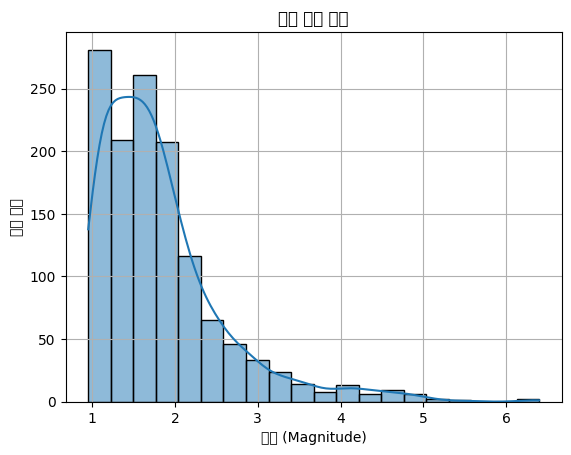

In [ ]:
# 📊 지진 규모 분포 시각화 (히스토그램)
sns.histplot(df_america['mag'], bins=20, kde=True)
plt.title("지진 규모 분포")
plt.xlabel("규모 (Magnitude)")
plt.ylabel("발생 빈도")
plt.grid(True)
plt.show()

## 📝 자유 탐구 추가 아이디어
- 다른 지역(예: 칠레, 알래스카 등)으로 필터링 조건을 바꿔 비교
- 지진이 자주 일어난 위치만 클러스터
- 규모가 큰 지진만 따로 표시하는 지도 생성
- `folium.Popup()`을 사용해 각 지진의 위치에 설명을 추가

In [ ]:
import folium
from folium.plugins import MarkerCluster

# 지도 생성
map = folium.Map(location=[20, -100], zoom_start=3)  # 아메리카 중심

# 클러스터링 객체 생성
marker_cluster = MarkerCluster().add_to(map)

# 클러스터링할 마커 추가
for _, row in df_america.iterrows():
    mag = row['mag']
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=mag * 1.5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=min(1.0, max(0.3, mag / 7)),
        popup=f"Magnitude: {mag:.2f}"
    ).add_to(marker_cluster)

# 결과 저장
map.save("earthquakes_cluster_map.html")
print("✅ 클러스터링된 지진 지도가 'earthquakes_cluster_map.html'로 저장되었습니다.")


✅ 클러스터링된 지진 지도가 'earthquakes_cluster_map.html'로 저장되었습니다.
